In [1]:
import collections

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib as mpl
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.pipeline
import sklearn.preprocessing

# Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>


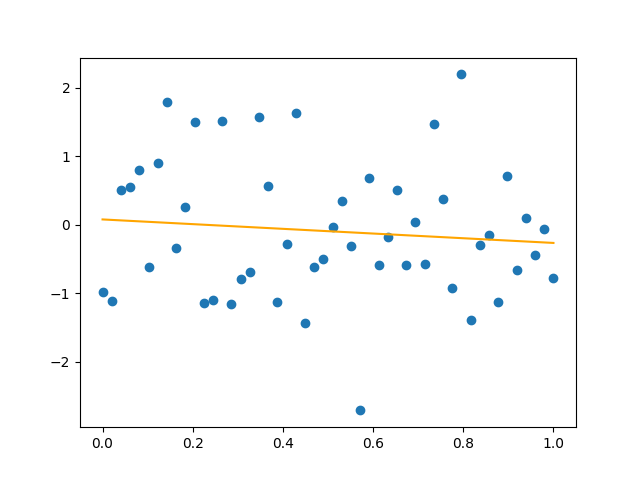

In [3]:
fig, ax = plt.subplots()

In [4]:
x = np.linspace(0, 1)
y = np.random.normal(size=len(x))

In [5]:
ax.scatter(x, y)

In [6]:
model = LinearRegression()
model.fit(np.expand_dims(x, 1), y)

LinearRegression()

In [7]:
model.coef_, model.intercept_

(array([-0.34305358]), 0.07829085572935318)

In [8]:
y_hat = model.predict(np.expand_dims(x, 1))

In [9]:
ax.plot(x, y_hat, color="orange")

# SVM

In [10]:
import sklearn.svm

In [11]:
data = sklearn.datasets.load_iris()
features = data.data
targets = data.target
names = data.target_names

<IPython.core.display.Javascript object>


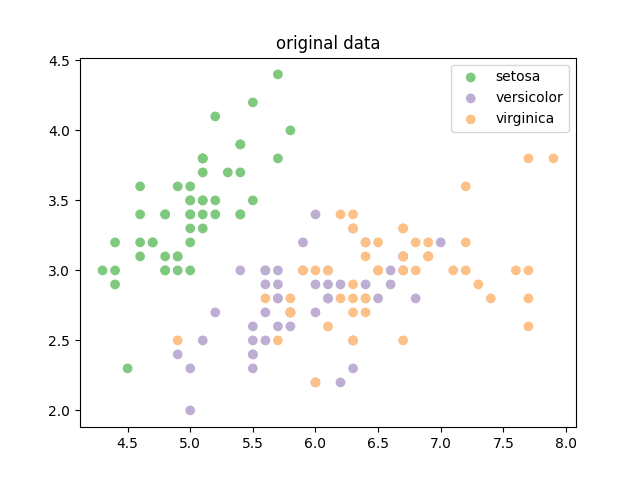

In [12]:
fig, ax = plt.subplots()
for i, (name, color) in enumerate(zip(names, get_cmap("Accent").colors)):
    indexer = targets == i
    ax.scatter(x=features[indexer, 0], y=features[indexer, 1], c=[color] * sum(indexer), label=name)
ax.legend()
ax.set_title("original data")
plt.show()

In [13]:
classifier = sklearn.svm.LinearSVC(loss="hinge", max_iter=100000)

In [14]:
classifier.fit(features, targets)

LinearSVC(loss='hinge', max_iter=100000)

In [15]:
classifier.score(features, targets)

0.94

<IPython.core.display.Javascript object>


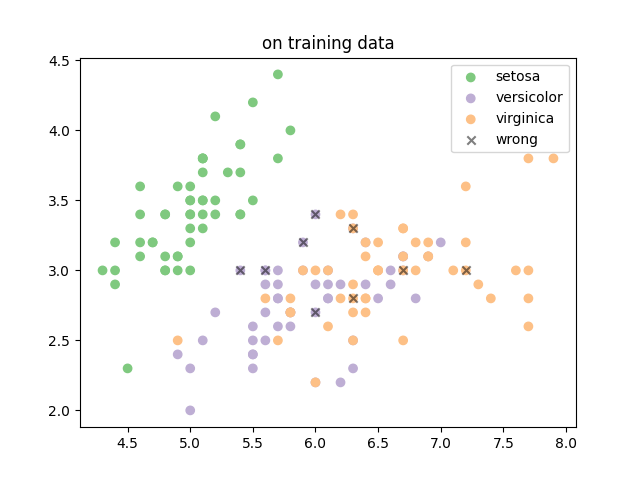

In [16]:
preds = classifier.predict(features)
scale = mpl.rcParams["lines.markersize"] ** 2
_Param = collections.namedtuple("_Param", ["color", "label"])

# indexers = [
#     (preds == targets, _Param("tab:green", "correct")),
#     (preds != targets, _Param("tab:red", "bad")),
# ]
# for indexer, params in indexers:
#     ax.scatter(x=features[indexer, 0], y=features[indexer, 1], **params._asdict())

fig, ax = plt.subplots()
for i, (name, color) in enumerate(zip(names, get_cmap("Accent").colors)):
    indexer = targets == i
    ax.scatter(x=features[indexer, 0], y=features[indexer, 1], c=[color] * sum(indexer), label=name)
ax.scatter(x=features[preds != targets, 0], y=features[preds != targets, 1],
           color="k", marker="x", alpha=.5, label="wrong")
ax.legend()

ax.set_title("on training data")
plt.show()

# PCA

In [17]:
import sklearn.decomposition

<IPython.core.display.Javascript object>


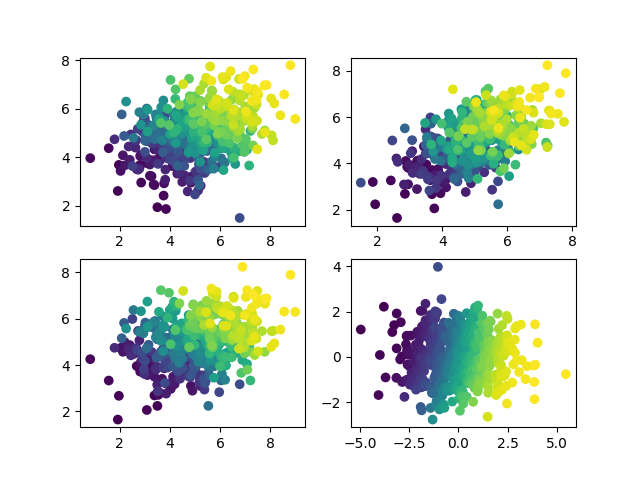

In [18]:
fig, axs = plt.subplots(2, 2)

In [19]:
for ax in fig.get_axes():
    ax.clear()
# plt.close("all")

In [20]:
# original data
n_points = 500
mean = (5, 5, 5)
cov = np.array([[2, .5, .5], [.5, 1, .5], [.5, .5, 1]])
data = np.random.multivariate_normal(mean, cov, size=n_points)

# indexes of points ordered by distance to 0
indexes = np.argsort(np.apply_along_axis(np.linalg.norm, 1, data))

In [21]:
# plot some canonical projections
ss = ((0, 0, 0, 1), (0, 1, 1, 2), (1, 0, 0, 2))
for i, j, d1, d2 in ss:
    axs[i][j].clear()
    axs[i][j].scatter(data[indexes, d1], data[indexes, d2], c=list(range(len(indexes))))

In [22]:
# PCA
pca = sklearn.decomposition.PCA(n_components=2)
data_pca = pca.fit_transform(data)

In [23]:
axs[1, 1].clear()
axs[1, 1].scatter(data_pca[indexes, 0], data_pca[indexes, 1], c=list(range(len(indexes))))

# PCA 2

In [24]:
import sklearn.decomposition

<IPython.core.display.Javascript object>


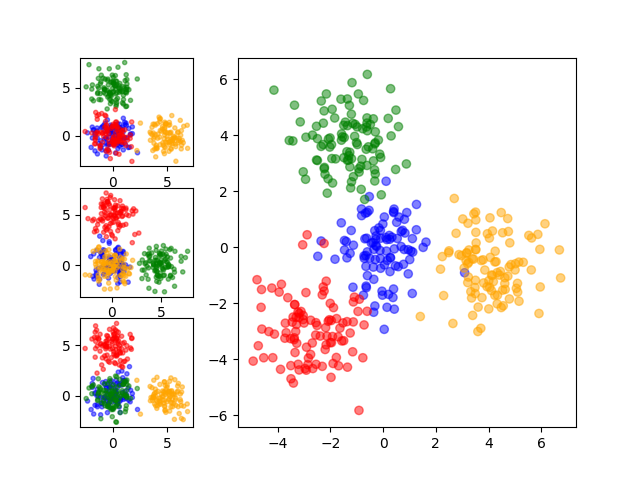

In [35]:
fig, axs = plt.subplots(2, 2)

In [56]:
# original data
n_points = 100
mean0 = (0, 0, 0)
mean1 = (5, 0, 0)
mean2 = (0, 5, 0)
mean3 = (0, 0, 5)
cov = np.eye(3)
data = np.concatenate((
    np.random.multivariate_normal(mean0, cov, size=n_points),
    np.random.multivariate_normal(mean1, cov, size=n_points),
    np.random.multivariate_normal(mean2, cov, size=n_points),
    np.random.multivariate_normal(mean3, cov, size=n_points),
))
clist = get_cmap("Accent").colors[:4]
clist = ("blue", "orange", "green", "red")
colors = [c for c in clist for _ in range(n_points)]

gs = mpl.gridspec.GridSpec(nrows=3, ncols=2, width_ratios=[1, 3])

fig.clear()

# plot some canonical projections
ss = ((0, 0, 1), (1, 1, 2), (2, 0, 2))
for i, d1, d2 in ss:
    ax = fig.add_subplot(gs[i, 0])
    ax.scatter(data[:, d1], data[:, d2], c=colors, alpha=.5, marker=".")

# PCA
pca = sklearn.decomposition.PCA(n_components=2)
data_pca = pca.fit_transform(data)

ax = fig.add_subplot(gs[:, 1])
ax.scatter(data_pca[:, 0], data_pca[:, 1], c=colors, alpha=.5)